In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


In [2]:
#1.load data

recipe = pd.read_csv(r'Final_recipe.csv',header=0,encoding = 'unicode_escape').dropna()  

In [3]:
recipe.shape

(20050, 2)

In [4]:
recipe.tail(11)

,ingredients,gluten-free
20119,"8 chicken legs,3 bay leaves,1 teaspoon dried t...",0
20120,"3 cups pitted dates (14 ounces),1 (750-ml) bot...",0
20121,"Cooking spray,One 3 1/2-pound chicken, cut int...",0
20122,"4 cups water,1 750-ml bottle vodka (about 3 1/...",0
20123,"1/2 cup plus 2 tablespoons water,1/2 cup sugar...",1
20124,"1 side pork spareribs, about 3 pounds,1/2 cup ...",0
20125,"2 large egg whites,3 oz Parmigiano-Reggiano, f...",0
20126,"5 1/2 cups (or more) low-salt chicken broth,2 ...",1
20127,"1 small tomato,1 small onion, finely chopped (...",0
20128,"4 tablespoons olive oil,4 shallots, thinly sli...",0


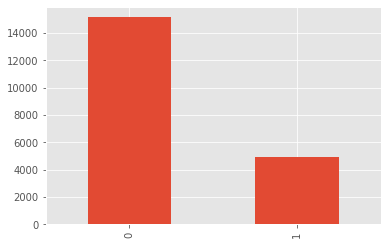

In [5]:
plt.style.use('ggplot')
recipe['gluten-free'].value_counts().plot(kind='bar')

In [6]:
# remove punctuation + numbers + non alphabetic characters
recipe['ingredients'] = recipe['ingredients'].str.replace("[^a-zA-Z]", ' ')

recipe['ingredients'].head(3)

0      cups low sodium vegetable or chicken stock  ...
1          cups whipping cream   medium onions  cho...
2      fennel bulb  sometimes called anise   stalks...
Name: ingredients, dtype: object

In [7]:
#2.data cleaning
temp = []
for s in recipe['ingredients']:
    # Remove Stop Words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(s)
    filtered_sentence = [w for w in word_tokens if w not in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    s = ' '.join(filtered_sentence)
    # Porter Stemmer Algorithm to Remove low-content adjectives
    ps = PorterStemmer()
    words = word_tokenize(s)
    word_ps = []
    for w in words:
        word_ps.append(ps.stem(w))
    s = ' '.join(word_ps)    
    temp.append(s)
recipe['ingredients'] = temp

print(recipe.head(3))

                                         ingredients  gluten-free
0  cup low sodium veget chicken stock cup dri bro...            0
1  cup whip cream medium onion chop teaspoon salt...            0
2  fennel bulb sometim call anis stalk discard bu...            0


In [10]:

doc=recipe['ingredients'].tolist()


In [11]:
doc

['cup low sodium veget chicken stock cup dri brown lentil cup dri french green lentil stalk celeri chop larg carrot peel chop sprig fresh thyme teaspoon kosher salt medium tomato core seed dice small fuji appl core dice tablespoon freshli squeez lemon juic teaspoon extra virgin oliv oil freshli ground black pepper tast sheet whole wheat lavash cut half crosswis inch flour tortilla pound turkey breast thinli slice head bibb lettuc',
 'cup whip cream medium onion chop teaspoon salt bay leav whole clove larg garlic clove crush teaspoon pepper teaspoon ground nutmeg pinch dri thyme crumbl larg shallot minc tablespoon butter pound trim boneless center pork loin sinew remov cut inch chunk well chill egg tablespoon purpos flour cup tawni port tablespoon dri currant minc lettuc leav crack peppercorn minc fresh parsley bay leav french bread baguett slice tablespoon oliv oil larg red onion halv slice tablespoon dri currant tablespoon red wine vinegar tablespoon can chicken broth teaspoon chop fr

In [20]:
count_vector = CountVectorizer()
count_vector.fit(doc) # Fit the documents and then return the matrix
features_names=count_vector.get_feature_names() # here the only words that we have
doc_array =count_vector.transform(doc) # here we transform the text to the Bag of Words
doc_array.toarray()

Y = np.array(recipe['gluten-free'])

In [22]:
doc_array =count_vector.transform(doc) # here we transform the text to the Bag of Words
doc_array=doc_array.toarray()
Y = np.array(recipe['gluten-free'])

In [23]:
frequency_matrix = pd.DataFrame(doc_array, columns=count_vector.get_feature_names())
frequency_matrix

,aalborg,aaron,aattach,about,abruzzo,absent,absinth,absolut,abuelita,acacia,...,zestepi,zester,zhoug,zinfandel,zinger,zingerman,ziti,zucchini,zweiback,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# split Dataset
X_train, X_test, y_train, y_test = train_test_split(doc_array, Y, test_size=0.2, random_state=42)

In [25]:
X_train.shape

(16040, 5051)

In [38]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
#print("Decision Tree Classifier Accuracy is ", tree.score(X_test, y_test) * 100, "%")

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
print("Decision Tree Classifier Accuracy is ", tree.score(X_test, y_test) * 100, "%")

Decision Tree Classifier Accuracy is  77.3067331670823 %


In [40]:
ada=AdaBoostClassifier()
ada.fit(X_train, y_train)
print("Decision Tree Classifier Accuracy is ",ada.score(X_test, y_test) * 100, "%")

Decision Tree Classifier Accuracy is  77.78054862842893 %


In [43]:
from sklearn.svm import SVC

In [47]:
svm=SVC(kernel='rbf', degree=3)
svm.fit(X_train, y_train)
print("SVM Classifier Accuracy is ", svm.score(X_test, y_test) * 100, "%")

SVM Classifier Accuracy is  75.81047381546135 %


In [48]:

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

print("Logistic Regression Accuracy is ", logistic.score(X_test, y_test) * 100, "%")

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Accuracy is  78.70324189526184 %


In [52]:
# perform KNN Algorithm
# the value of K is chosen based on this function k = sqrt(n) where n is the number of data points
K=np.round(np.sqrt(len(recipe)))

neigh = KNeighborsClassifier(n_neighbors=100, weights='uniform', algorithm='auto')
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print("K:", K, "Accuracy is ", accuracy_score(y_test, y_pred) * 100, "%")

K: 142.0 Accuracy is  76.53366583541147 %


In [39]:
np.array(X_train)

array(<1x5051 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>, dtype=object)

In [41]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=30)
clf.fit(X_train, y_train)

print("Random Forest Classifier Accuracy is ", clf.score(X_test, y_test) * 100, "%")

Random Forest Classifier Accuracy is  80.32418952618454 %


In [42]:
from sklearn.externals import joblib
# Output a pickle file for the model
joblib.dump(clf, 'saved_model.pkl')

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['saved_model.pkl']

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=10, random_state=42).fit(X_train, y_train)
print("Accuracy is ", clf.score(X_test, y_test) * 100, "%")

Accuracy is  76.9077306733167 %
